In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
from scipy import stats 
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df_well_data = pd.read_csv('well_data.csv')

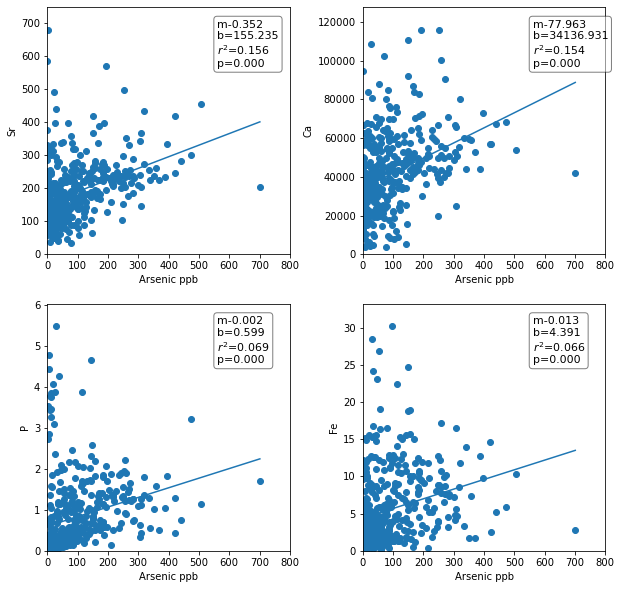

In [3]:
elems=['Sr','Ca','P','Fe']
nrows = 2
ncols = int(len(elems)/nrows)

fig,ax2d = plt.subplots(nrows, ncols)
fig.set_size_inches(10, 10)
ax = np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props = dict(boxstyle = 'round', facecolor = 'white', alpha = 0.5)
 
for i, elem in enumerate(elems):
        ax[i].scatter(df_well_data.As, df_well_data[elem])
        ax[i].set_xlabel('Arsenic ppb')
        ax[i].set_ylabel(elem)
        ax[i].set_ylim([0,df_well_data[elem].max()*1.1])
        ax[i].set_xlim([0, 800])
        
        results = stats.linregress(df_well_data[['As', elem]].dropna())
        textstr = 'm-{:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope, results.intercept, results.rvalue**2, results.pvalue)
    
        x=np.array([df_well_data.As.min(),df_well_data.As.max()])
        ax[i].plot(x,results.slope*x+results.intercept)
        ax[i].text(0.7,0.95,textstr,transform=ax[i].transAxes,fontsize=11\
         ,verticalalignment='top',bbox=props)

        

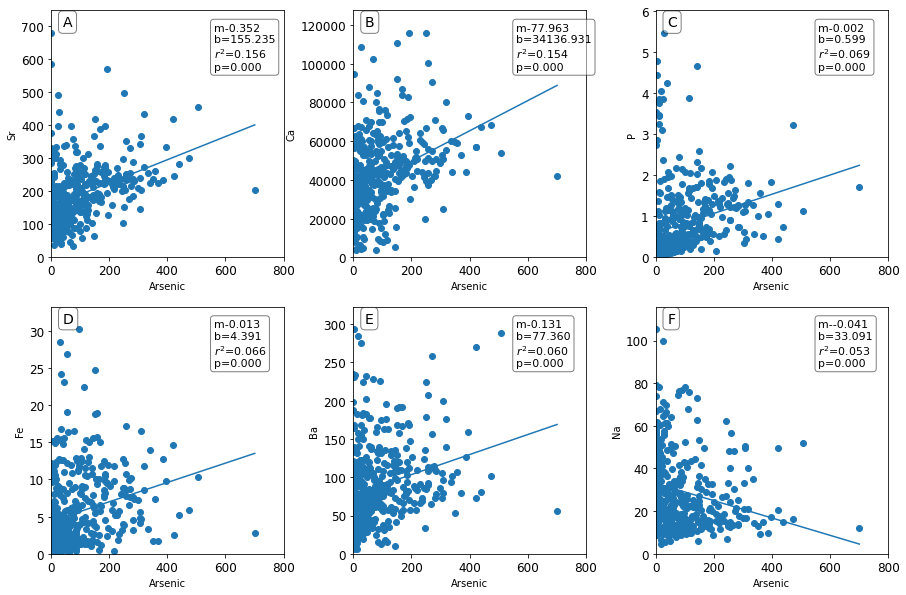

In [6]:
df = df_well_data
xval = 'As'
xvalname = 'Arsenic'
elems=['Sr','Ca','P','Fe', 'Ba', 'Na']
filename=xval+'_correlations.png' #what is ths mean 

nrows = 2
ncols = int(len(elems)/nrows)

fig,ax2d = plt.subplots(nrows, ncols)
fig.set_size_inches(15, 10)
ax = np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props = dict(boxstyle = 'round', facecolor = 'white', alpha = 0.5)
 
for i, elem in enumerate(elems):
        ax[i].scatter(df[xval], df[elem])
        ax[i].set_xlabel(xvalname)
        ax[i].set_ylabel(elem)
        ax[i].set_ylim([0,df[elem].max()*1.1])
        ax[i].set_xlim([0, 800])
        
        results = stats.linregress(df[[xval, elem]].dropna())
        textstr = 'm-{:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope, results.intercept, results.rvalue**2, results.pvalue)
    
        x=np.array([df[xval].min(),df[xval].max()])
        ax[i].plot(x,results.slope*x+results.intercept)
        ax[i].text(0.7,0.95, textstr,transform=ax[i].transAxes,fontsize=11\
         ,verticalalignment='top',bbox=props)
        
        ax[i].tick_params(axis = 'both', which = 'major', labelsize = 12)
        ax[i].text(0.05, 0.98, chr(i + ord('A')), transform = ax[i].transAxes,fontsize = 14, verticalalignment = 'top', bbox = props)
        
fig.savefig(filename)
        